In [27]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.animation as animate
# for vscode, use 'ipympl'; for browser, use 'notebook'
%matplotlib ipympl
# this is for colorbars on subplots
from mpl_toolkits.axes_grid1 import make_axes_locatable
# for rendering latex
from IPython.display import display, Math, Latex
import matplotlib.font_manager
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]})

fname = "./data/particles.txt"

omega = np.zeros(2);

with open(fname) as f:
    shapeData = f.readline()
    dim = int(f.readline())
    p = f.readline()

params = p.split()
IC_type_space = float(params[0])
IC_type_mass = float(params[1])
omega[0]= float(params[2])
omega[1]= float(params[3])
X0_space = float(params[4])
hat_pct = float(params[5])
X0_mass = float(params[6])
maxT = float(params[7])
dt = float(params[8])
D = float(params[9])
pctRW = float(params[10])
cdist_coeff = float(params[11])
cutdist = float(params[12])
data = np.loadtxt(fname, skiprows=3)

In [28]:
# delta IC
sigma = 0.0

shapeData = shapeData.split()
shapeData = [int(i) for i in shapeData]
Np = shapeData[0]
Nsteps = shapeData[1] + 1

In [29]:
X = np.ndarray([dim, Np, Nsteps])

for i in range(dim):
    X[i, :, :] = np.reshape(data[:, i], (Np, Nsteps), 'f')
mass = np.reshape(data[:, dim], (Np, Nsteps), 'f')

In [30]:
L = omega[1] - omega[0]

def analytic1d(X, t, sigma, D, L):
    sol =  (1 / np.sqrt(2 * np.pi * (sigma + 2 * D * t)))\
        * np.exp(-((0.5 * L - X[:])**2 / (2 * (sigma + 2 * D * t))));
    return sol

def analytic2d(dim, X, Y, t, sigma, D, L):
    sol =  (1 / np.power(2 * np.pi * (sigma + 2 * D * t), float(dim) / 2.0))\
           * np.exp(-(((0.5 * L - X)**2 + (0.5 * L - Y)**2)/ (2 * (sigma + 2 * D * t))));
    return sol

IndexError: index 1 is out of bounds for axis 0 with size 1

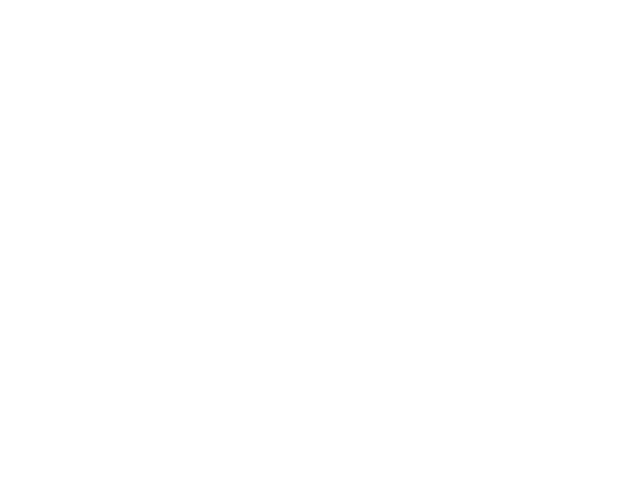

In [31]:
fig = plt.figure()
plt.scatter(X[0, :, 0], X[1, :, 0], c=mass[:, 0], cmap='cividis', label='PT')
# plt.scatter(X[-1, :], asoln, label='analytic')
plt.colorbar()
# plt.legend()
plt.title('Initial')
plt.show()

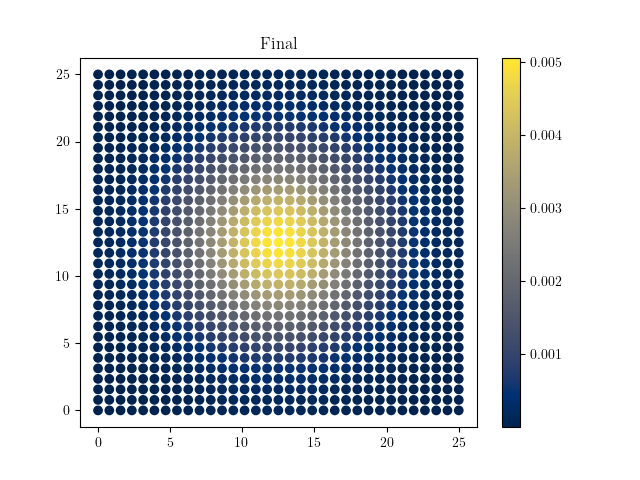

In [ ]:
fig = plt.figure()
plt.scatter(X[0, :, -1], X[1, :, -1], c=mass[:, -1], cmap='cividis', label='PT')
# plt.scatter(X[-1, :], asoln, label='analytic')
plt.colorbar()
# plt.legend()
plt.title('Final')
plt.show()

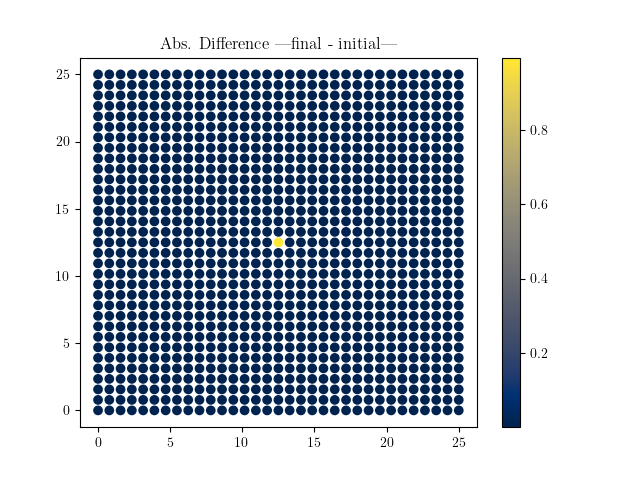

In [ ]:
fig = plt.figure()
plt.scatter(X[0, :, -1], X[1, :, -1], c=abs(mass[:, -1] - mass[:, 0]), cmap='cividis', label='PT')
# plt.scatter(X[-1, :], asoln, label='analytic')
plt.colorbar()
# plt.legend()
plt.title('Abs. Difference |final - initial|')
plt.show()

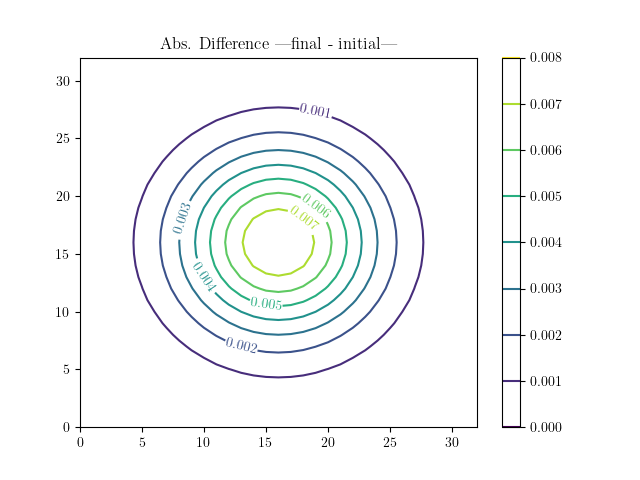

In [ ]:
asoln = analytic2d(dim, X[0, :, -1], X[1, :, -1], maxT, sigma, D, L)

fig= plt.figure()
Npsqrt = int(np.sqrt(Np))
cp = plt.contour(np.reshape(asoln, (Npsqrt, Npsqrt)))
plt.clabel(cp, inline=True, fontsize=10)
# plt.scatter(X[-1, :], asoln, label='analytic')
plt.colorbar()
# plt.legend()
plt.title('Abs. Difference |final - initial|')
plt.show()

Text(0.5, 1.0, 'Absolute Difference $\\left(\\vert q_s(T) - q_a(T) \\vert\\right)$')

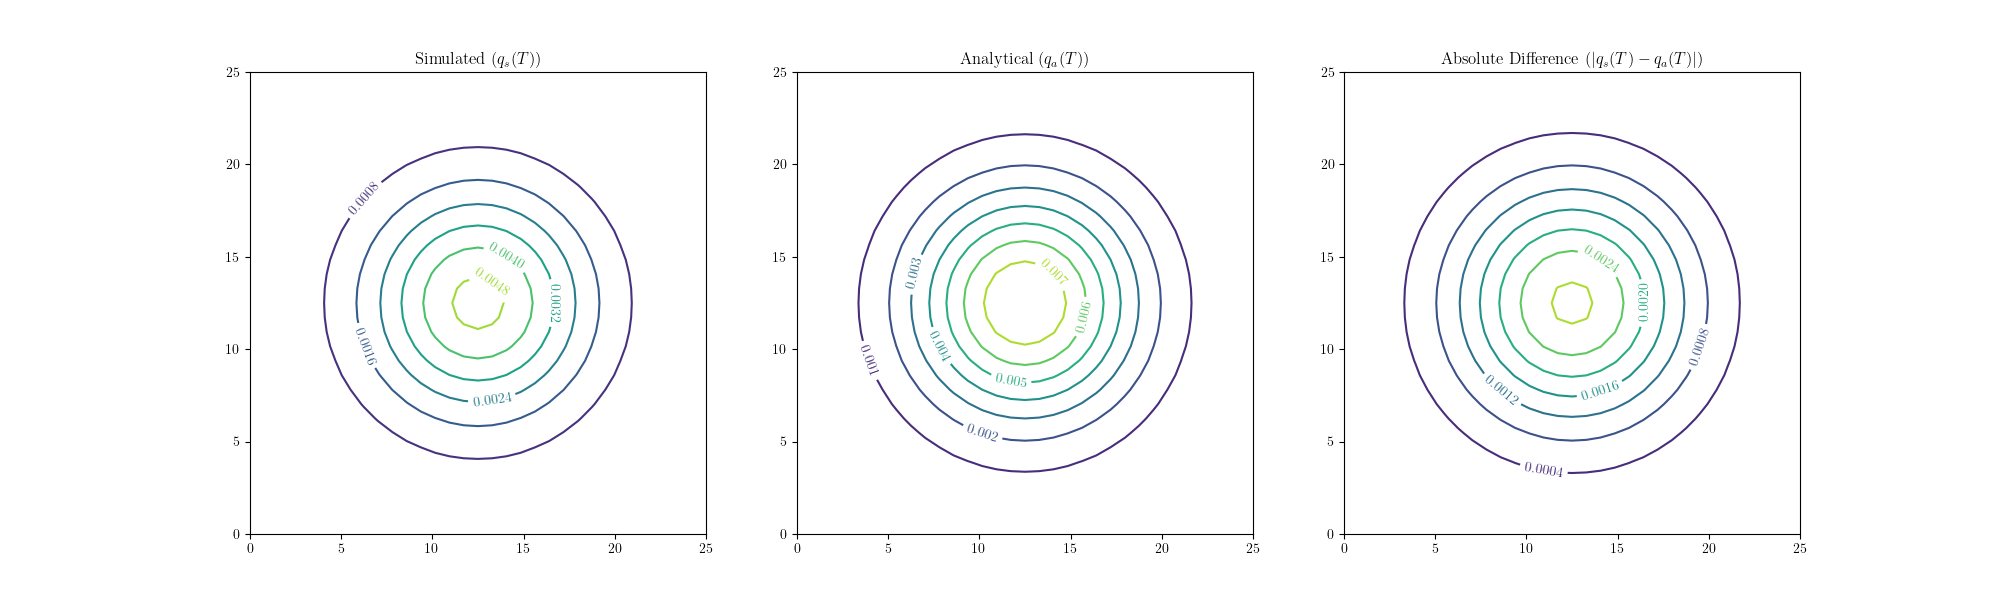

In [ ]:
fig = plt.figure(figsize=(20, 6))

Npsqrt = int(np.sqrt(Np))
xgrid = np.reshape(X[0, :, -1], (Npsqrt, Npsqrt))
ygrid = np.reshape(X[1, :, -1], (Npsqrt, Npsqrt))

ax1 = fig.add_subplot(131)
p1 = ax1.contour(xgrid, ygrid, np.reshape(mass[:, -1], (Npsqrt, Npsqrt)))
ax1.clabel(p1, inline=True, fontsize=10)
ax1.set_title(r'Simulated $(q_s(T))$')

asoln = analytic2d(dim, X[0, :, -1], X[1, :, -1], maxT, sigma, D, L)
ax2 = fig.add_subplot(132)
p2 = ax2.contour(xgrid, ygrid, np.reshape(asoln, (Npsqrt, Npsqrt)))
ax2.clabel(p2, inline=True, fontsize=10)
ax2.set_title(r'Analytical $(q_a(T))$')

ax3 = fig.add_subplot(133)
p3 = ax3.contour(xgrid, ygrid, np.reshape(abs(asoln - mass[:, -1]), (Npsqrt, Npsqrt)))
ax3.clabel(p3, inline=True, fontsize=10)
ax3.set_title(r'Absolute Difference $\left(\vert q_s(T) - q_a(T) \vert\right)$')

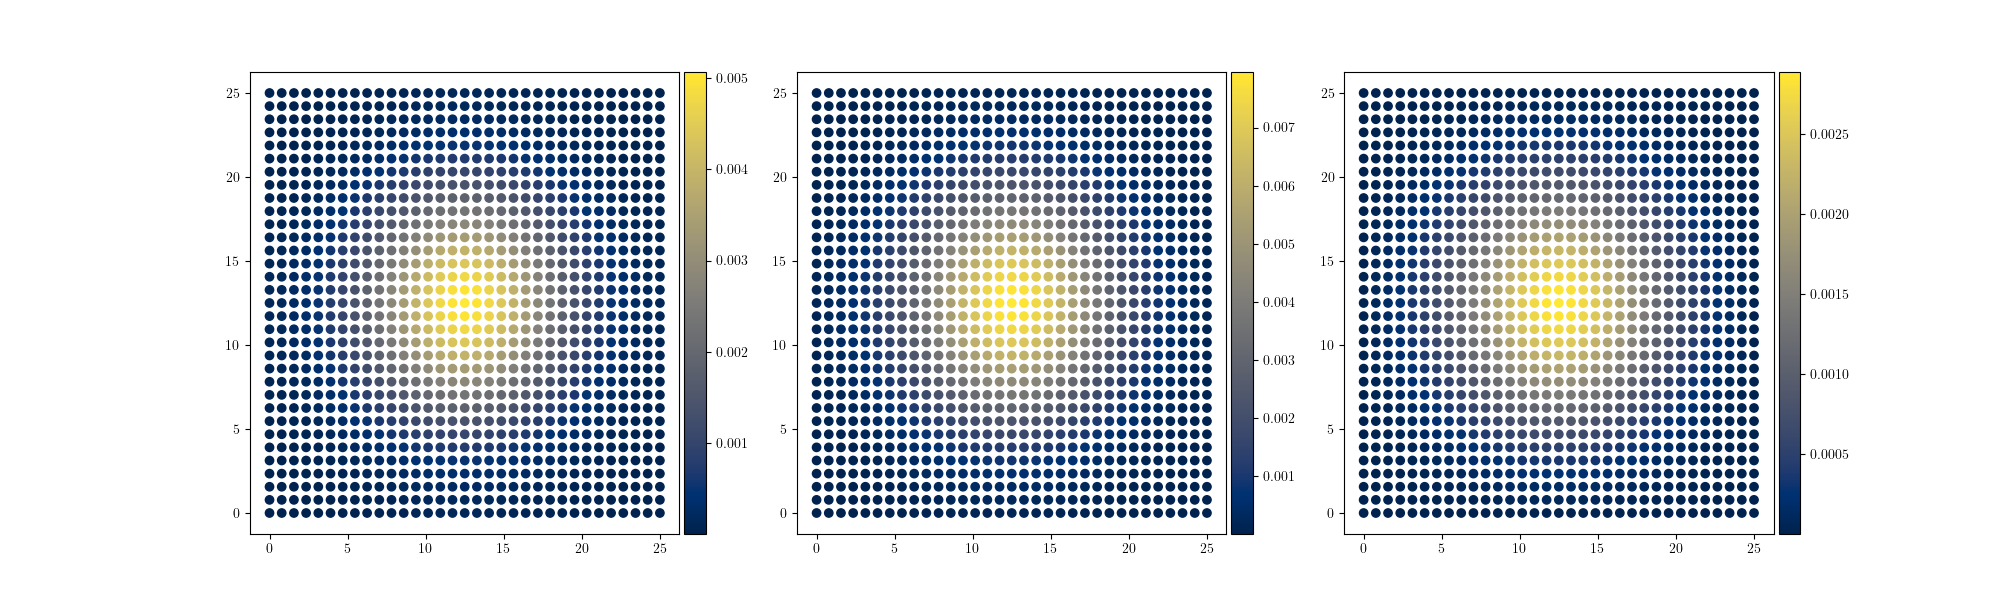

In [ ]:
fig = plt.figure(figsize=(20, 6))

ax1 = fig.add_subplot(131)
p1 = ax1.scatter(X[0, :, -1], X[1, :, -1], c=mass[:, -1], cmap='cividis', label='PT')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p1, cax=cax, orientation='vertical')

asoln = analytic2d(dim, X[0, :, -1], X[1, :, -1], maxT, sigma, D, L)
ax2 = fig.add_subplot(132)
p2 = ax2.scatter(X[0, :, -1], X[1, :, -1], c=asoln, cmap='cividis', label='Analytical')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(133)
p3 = ax3.scatter(X[0, :, -1], X[1, :, -1], c=abs(asoln - mass[:, -1]), cmap='cividis', label='Difference')
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(p3, cax=cax, orientation='vertical')

In [ ]:
# framesNum = Nsteps

# def massAnimation(frame):
#     if frame == framesNum:
#         plt.close(fig)
#     else:
#         plt.cla()
#         p = plt.scatter(X[0, :, frame], X[1, :, frame], c=mass[:, frame], cmap='cividis')

# # plot the animation
# fig = plt.figure()
# ani = animate.FuncAnimation(fig, massAnimation, frames=framesNum + 1)
# plt.show()

In [32]:
asoln = analytic1d(X[0, :, -1], maxT, sigma, D, L)
asoln = asoln / sum(asoln)

error_2norm = la.norm(asoln - mass[:, -1], ord=2)
error_infnorm = la.norm(asoln - mass[:, -1], ord=np.inf)
MSE = np.square(np.subtract(asoln, mass[:, -1])).mean() 
 
RMSE = np.sqrt(MSE)
print('RMSE = ', RMSE, ', 2-norm error = ', error_2norm, ', infinity-norm error = ', error_infnorm)

RMSE =  0.059973804476617334 , 2-norm error =  1.897486253078774 , infinity-norm error =  0.26799005218518407


In [ ]:
55**2

3025